In [126]:
import csv
import pandas as pd
import os
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt
import json
#%pip install tqdm
matplotlib.style.use('dark_background')
from sklearn import datasets, linear_model

      avgcpu  node_count cluster_type workload engine_type data_size  \
0  40.520195          10   c4.2xlarge     join       spark   bigdata   
1  27.190990          10   c4.2xlarge     join       spark      huge   
2  87.612579          10   c4.2xlarge   kmeans    spark1.5   bigdata   
3  82.041642          10   c4.2xlarge   kmeans    spark1.5      huge   
4   3.758062          10   c4.2xlarge       lr       spark   bigdata   

   elapsed_time  
0    305.064000  
1    365.106000  
2   1891.752434  
3    867.933524  
4   4142.607000  


<AxesSubplot: xlabel='node_count'>

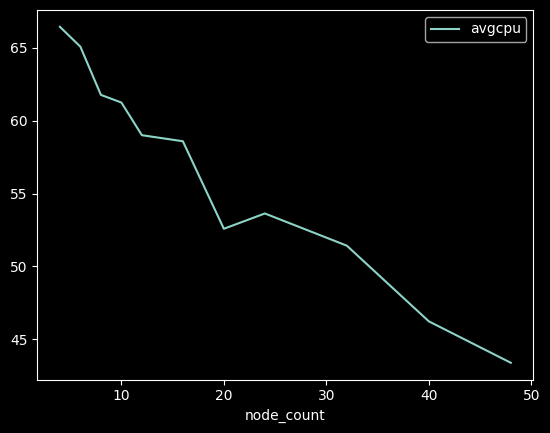

In [114]:
path = "../processed/scout/average_utils/averages.csv"

averagesdf=pd.read_csv(path)
print(averagesdf.head())

averagesdf.groupby('node_count')['avgcpu'].mean(numeric_only=True).plot(legend=True)

<AxesSubplot: xlabel='workload'>

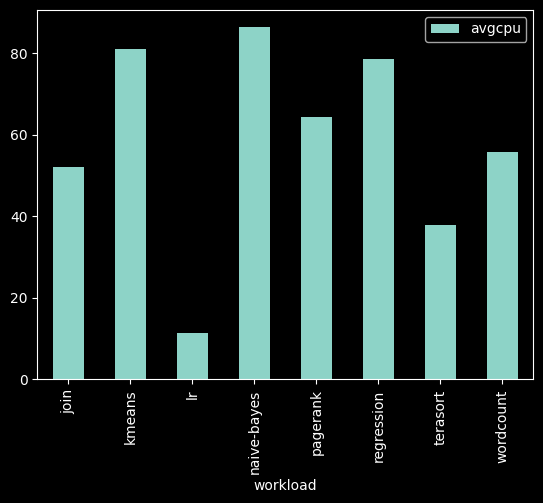

In [96]:
averagesdf.groupby('workload')['avgcpu'].mean(numeric_only=True).plot(kind='bar',legend=True)

<AxesSubplot: xlabel='cluster_type'>

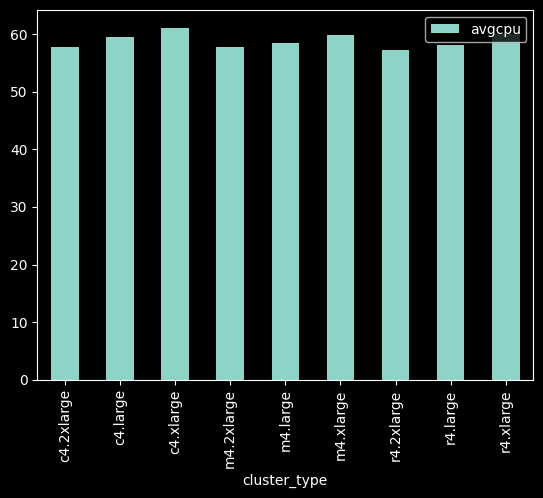

In [97]:
#look into it with different jobs as well as cluster type 
averagesdf.groupby('cluster_type')['avgcpu'].mean(numeric_only=True).plot(kind='bar',legend=True)

<AxesSubplot: xlabel='data_size'>

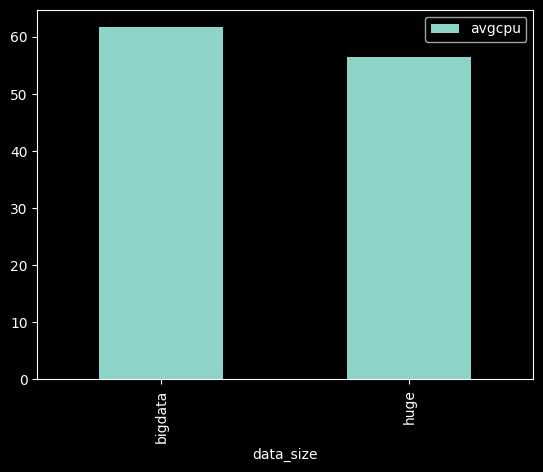

In [98]:
averagesdf.groupby('data_size')['avgcpu'].mean(numeric_only=True).plot(kind='bar',legend=True)

<AxesSubplot: xlabel='engine_type'>

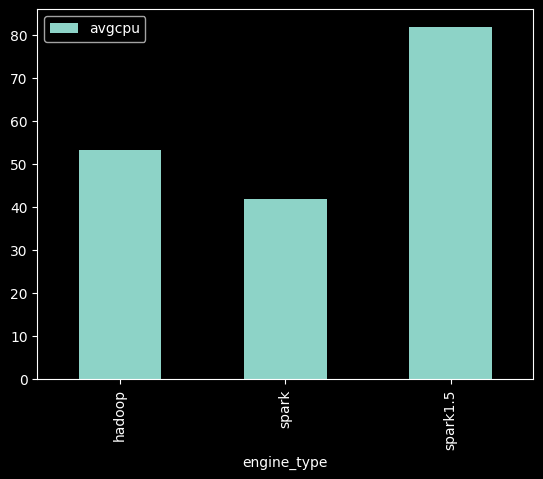

In [99]:
averagesdf.groupby('engine_type')['avgcpu'].mean(numeric_only=True).plot(kind='bar',legend=True)

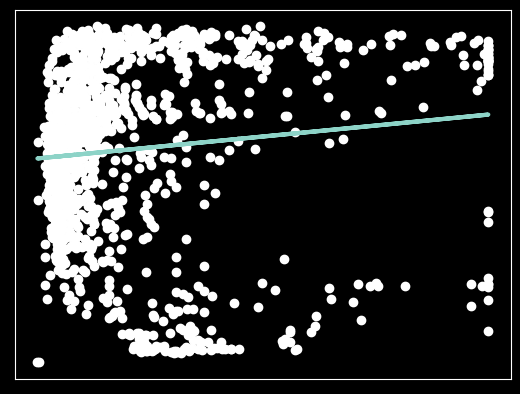

In [125]:
#from sklearn import datasets, linear_model
x,y=averagesdf['elapsed_time'],averagesdf['avgcpu']
vals=1242
x = x.values.reshape(1242, 1)
y = y.values.reshape(1242, 1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
plt.scatter(x, y,  color='white')
plt.plot(x, regr.predict(x), linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [129]:
'''Script creates CSV storing average node CPU utilisation of each run'''

path = "../raw/osr_multiple_nodes/"
counter = 0
fulldfs = []
folders=os.listdir(path)
nooffolders=len(folders)
for x in folders:
    counter += 1
    #print(x)

    subpath = path+x
    nodedfs = []
    for y in os.listdir(subpath):
        if y == "report.json":
            with open(subpath+'/'+y,'r') as f:
                report = json.load(f)
                elapsed_time=report['elapsed_time']
        else:
            df = pd.read_csv(subpath+"/"+y)
            d = {'avgcpu': [df["cpu.%usr"].mean()]}
            avgdf = pd.DataFrame(data=d)
            nodedfs.append(avgdf)
    alldfs = pd.concat(nodedfs)
    avg = alldfs.groupby(level=0).mean(numeric_only=True)

    node_count, cluster_type, workload, engine_type, data_size, _ = x.split(
        "_")
    avg = avg.assign(node_count=[node_count], cluster_type=[cluster_type], workload=[
                     workload], engine_type=[engine_type], data_size=[data_size],elapsed_time=[elapsed_time],name=[x]) 
    fulldfs.append(avg)
    print(f'completed {counter}/{nooffolders}')
    
    #if counter == 10:
    #    break
all = pd.concat(fulldfs)
dfpath = Path(f"../processed/scout/average_utils/averages.csv")
all.to_csv(dfpath, index=False)


10_c4.2xlarge_join_spark_bigdata_1
completed 1/1242
10_c4.2xlarge_join_spark_huge_1
completed 2/1242
10_c4.2xlarge_kmeans_spark1.5_bigdata_1
completed 3/1242
10_c4.2xlarge_kmeans_spark1.5_huge_1
completed 4/1242
10_c4.2xlarge_lr_spark_bigdata_1
completed 5/1242
10_c4.2xlarge_lr_spark_huge_1
completed 6/1242
10_c4.2xlarge_naive-bayes_spark1.5_bigdata_1
completed 7/1242
10_c4.2xlarge_naive-bayes_spark1.5_huge_1
completed 8/1242
10_c4.2xlarge_pagerank_hadoop_bigdata_1
completed 9/1242
10_c4.2xlarge_pagerank_hadoop_huge_1
completed 10/1242
10_c4.2xlarge_pagerank_spark_bigdata_1
completed 11/1242
10_c4.2xlarge_pagerank_spark_huge_1
completed 12/1242
10_c4.2xlarge_regression_spark1.5_bigdata_1
completed 13/1242
10_c4.2xlarge_regression_spark1.5_huge_1
completed 14/1242
10_c4.2xlarge_terasort_hadoop_bigdata_1
completed 15/1242
10_c4.2xlarge_terasort_hadoop_huge_1
completed 16/1242
10_c4.2xlarge_wordcount_hadoop_bigdata_1
completed 17/1242
10_c4.2xlarge_wordcount_hadoop_huge_1
completed 18/124

In [10]:
'''Old Script'''

path = "../raw/osr_single_node/"
counter = 0

# loop through unprocessed files
for x in os.listdir(path):
    counter += 1

    subpath = path+x+"/sar.csv"
    df = pd.read_csv(subpath)
    # compute averages across file and store
    d = {'name': [x], 'avgcpu': [df["cpu.%usr"].mean()], 'avgmem': [
        df["memory.%memused"].mean()], 'avgdisk': [df["disk.%util"].mean()]}
    avgdf = pd.DataFrame(data=d)

    dfpath = Path(f"../processed/scout/average_utils/{x}.csv")
    avgdf.to_csv(dfpath, index=False)
    if counter == 6:
        break


In [13]:
'''Old Script'''
path = "../raw/osr_single_node/"
counter = 0

# loop through unprocessed files
for x in os.listdir(path):
    counter += 1

    subpath = path+x+"/sar.csv"
    df = pd.read_csv(subpath)
    # store 5s utilisation data
    d = {'cpu': df["cpu.%usr"], 'mem': df["memory.%memused"],
         'disk': df["disk.%util"]}
    avgdf = pd.DataFrame(data=d)
    dfpath = Path(f"../processed/scout/slim_data/{x}.csv")
    avgdf.to_csv(dfpath, index=False)
    if counter == 6:
        break


In [14]:
'''Old Script'''

# loop through slimmed down files
path = "../processed/scout/slim_data/"
counter = 0


dfs = []

for x in os.listdir(path):
    fullpath = path+x
    if os.path.isfile(fullpath):
        counter += 1
        df = pd.read_csv(fullpath)
        dfs.append(df)

        # store combined csv and start again
        if x[-5] == '3':
            alldfs = pd.concat(dfs)
            dfpath = Path(
                f"../processed/scout/slim_data/runs_merged/{x[:-6]}.csv")
            alldfs.to_csv(dfpath, index=False)
            dfs = []
            continue

        if counter == 6:
            break
